In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1 따릉이 데이터 중 서울특별시 공공자전거 이용정보(일별) 2021년 01월 자료를 이용한다. 
-  다운로드 받은 파일명 :공공자전거 이용정보(일별)_2021.01.csv (47.7 MB)
-  저장한 파일명 :bikeusage_202101.csv

In [2]:
# 대여일자는 날자형으로 변환하여 읽어들인다. 
bikeusage = pd.read_csv('data/bikeusage_202101.csv', encoding = 'cp949', parse_dates = ['대여일자'])


In [3]:
bikeusage

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-01-01,101,101. (구)합정동 주민센터,일일(회원),\N,AGE_002,1,0.00,0.00,0.00,46
1,2021-01-01,101,101. (구)합정동 주민센터,일일(회원),M,AGE_002,1,0.00,0.00,0.00,48
2,2021-01-01,101,101. (구)합정동 주민센터,정기,\N,AGE_002,1,0.00,0.00,0.00,31
3,2021-01-01,101,101. (구)합정동 주민센터,정기,\N,AGE_005,1,0.00,0.00,0.00,30
4,2021-01-01,101,101. (구)합정동 주민센터,정기,F,AGE_003,1,0.00,0.00,0.00,78
...,...,...,...,...,...,...,...,...,...,...,...
474626,2021-01-31,3587,3587.우성식품 앞,정기,F,AGE_003,2,42.03,0.40,1746.75,77
474627,2021-01-31,3587,3587.우성식품 앞,정기,M,AGE_005,1,129.34,1.11,4803.09,41
474628,2021-01-31,3588,3588.세종대학교(영실관),정기,M,AGE_002,2,33.56,0.28,1210.58,11
474629,2021-01-31,3588,3588.세종대학교(영실관),정기,M,AGE_003,2,25.68,0.25,1080.61,11


## 2. 다음의 순서로 초기 데이터 점검 (분석루틴)을 수행하여 정돈한다. 

In [4]:
# 2.1 .head() 로 데이터의 컬럼과 어떤 값이 들어있는지 확인
bikeusage.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-01-01,101,101. (구)합정동 주민센터,일일(회원),\N,AGE_002,1,0.00,0.00,0.0,46
1,2021-01-01,101,101. (구)합정동 주민센터,일일(회원),M,AGE_002,1,0.00,0.00,0.0,48
2,2021-01-01,101,101. (구)합정동 주민센터,정기,\N,AGE_002,1,0.00,0.00,0.0,31
3,2021-01-01,101,101. (구)합정동 주민센터,정기,\N,AGE_005,1,0.00,0.00,0.0,30
4,2021-01-01,101,101. (구)합정동 주민센터,정기,F,AGE_003,1,0.00,0.00,0.0,78


In [5]:
# 2.2 .shape로 데이터 컬럼수와 행의 개수 확인
bikeusage.shape

(474631, 11)

In [6]:
# 2.3 .info()로 누락값의 비율, 데이터 사용량, 자료형 확인
bikeusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474631 entries, 0 to 474630
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   대여일자     474631 non-null  datetime64[ns]
 1   대여소번호    474631 non-null  int64         
 2   대여소      474631 non-null  object        
 3   대여구분코드   474631 non-null  object        
 4   성별       442580 non-null  object        
 5   연령대코드    474631 non-null  object        
 6   이용건수     474631 non-null  int64         
 7   운동량      474631 non-null  object        
 8   탄소량      474631 non-null  object        
 9   이동거리(M)  474631 non-null  float64       
 10  이용시간(분)  474631 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 39.8+ MB


In [13]:
# 2.4  .memory_usage(deep=True) 를 사용해서 총 메모리 사용량을 확인한다. 
#       mem_old에 총사용량을 저장한다.  (실제로는 약 230 MB 정도 사용하고 있다. )
mem_old = bikeusage.memory_usage(deep=True).sum()
mem_old

229851720

In [14]:
# 2.5 .describe()  수치형으로 기술 통계 확인
bikeusage.describe()

,대여소번호,이용건수,이동거리(M),이용시간(분)
count,474631.000000,474631.000000,474631.000000,474631.000000
mean,1409.829944,1.669941,4639.316900,42.982490
std,929.803462,1.315851,6737.240458,55.616423
min,3.000000,1.000000,0.000000,0.000000
25%,621.000000,1.000000,1081.715000,11.000000
50%,1248.000000,1.000000,2513.140000,25.000000
75%,2089.000000,2.000000,5670.505000,55.000000
max,9999.000000,61.000000,463301.420000,3906.000000


In [15]:
# 2.6 .describe(include = 'object’) 로 문자열 정보 확인, 
bikeusage.describe(include = 'object')

,대여소,대여구분코드,성별,연령대코드,운동량,탄소량
count,474631,474631,442580,474631,474631,474631
unique,2056,5,5,8,59379,1806
top,502. 뚝섬유원지역 1번출구 앞,정기,\N,AGE_002,0.00,0.00
freq,734,367609,178367,154416,37614,37800


In [16]:
# 2.7 범주형 컬럼의 대표 항목값을 확인   (범주화 대상후보 : 대여구분코드, 성별, 연령대코드)
display(bikeusage['대여구분코드'].value_counts())
display(bikeusage['성별'].value_counts())
display(bikeusage['연령대코드'].value_counts())

정기         367609
일일(회원)     100938
단체           2990
일일(비회원)      2467
BIL_021       627
Name: 대여구분코드, dtype: int64

\N    178367
M     164375
F      99657
m        145
f         36
Name: 성별, dtype: int64

AGE_002    154416
AGE_003    113444
AGE_004     86369
AGE_005     60538
AGE_001     23400
AGE_006     22931
AGE_008      9850
AGE_007      3683
Name: 연령대코드, dtype: int64

In [21]:
# 2.8 수치형 데이터로 생각되는 object 형 데이터의 주요 항목유형 확인 (운동량, 탄소량)
#  \N 문자열이 문제가 됨.
display(bikeusage['운동량'].value_counts().head())
display(bikeusage['탄소량'].value_counts().head())

0.00    37614
\N       2244
2.27      157
0.01      139
9.02      138
Name: 운동량, dtype: int64

0.00    37800
0.19     4877
0.16     4804
0.18     4785
0.22     4699
Name: 탄소량, dtype: int64

In [22]:
# 2.9 다음과 같이 자료형 변환을 수행한다. 
"""
0   대여일자     474631 non-null  datetime64[ns]  
 1   대여소번호    474631 non-null  int64    --> int16     
 2   대여소      474631 non-null  object     --> category   
 3   대여구분코드   474631 non-null  object  --> category      
 4   성별       442580 non-null  object     --> category   
 5   연령대코드    474631 non-null  object  --> category      
 6   이용건수     474631 non-null  int64    --> int16     
 7   운동량      474631 non-null  object    --> 잠정유지   
 8   탄소량      474631 non-null  object    --> 잠정유지    
 9   이동거리(M)  474631 non-null  float64     
 10  이용시간(분)  474631 non-null  int64    --> int16     
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
"""
col_dict = dict (대여소번호= 'int16', 대여소 = 'category', 대여구분코드 = 'category', 성별 = 'category', 연령대코드 = 'category', 이용건수 = 'int16')

bikeusage = bikeusage.astype(col_dict)
bikeusage['이용시간(분)'] = bikeusage['이용시간(분)'].astype('int16')

bikeusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474631 entries, 0 to 474630
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   대여일자     474631 non-null  datetime64[ns]
 1   대여소번호    474631 non-null  int16         
 2   대여소      474631 non-null  category      
 3   대여구분코드   474631 non-null  category      
 4   성별       442580 non-null  category      
 5   연령대코드    474631 non-null  category      
 6   이용건수     474631 non-null  int16         
 7   운동량      474631 non-null  object        
 8   탄소량      474631 non-null  object        
 9   이동거리(M)  474631 non-null  float64       
 10  이용시간(분)  474631 non-null  int16         
dtypes: category(4), datetime64[ns](1), float64(1), int16(3), object(2)
memory usage: 19.6+ MB


In [23]:
# 2.10 변경된 메모리 사용량 확인 (mem_new(스칼라)에 총 사용량을 저장한다. )
#      mem_new/mem_old의 비율을 확인한다. 
mem_new = bikeusage.memory_usage(deep=True).sum()
print(mem_new)
print(mem_new/mem_old)

71696500
0.31192500974106263


In [29]:
# 2.11 일자형 데이터를 일자로 읽어들여서 데이터의 시작과 끝을 확인한다.
bikeusage.describe(include = 'datetime').T

,count,unique,top,freq,first,last
대여일자,474631,31,2021-01-25,25687,2021-01-01,2021-01-31


## 3. 다음 2가지 데이터에 대한 이슈를 해결한다. 
- 3.1 운동량, 탄소량에 포함된 '\\N' 을 np.nan으로 변환하고 float32로 형변환
- 3.2 성별 m, f 를 M, F로 통일하고 '\\N'을 np.nan으로 변환
- 3.3 bikeusage의 info와 memory_usage를 확인한다.


In [ ]:
# 3.1 운동량, 탄소량에 포함된 '\N' 을 np.nan으로 변환하고 float32로 형변환

In [35]:
# 3.1.1 운동량, 탄소량에 포함된 '\\N' 을 np.nan으로 변환한다. .mask method를 이용한다. 
bikeusage.운동량.mask ( bikeusage['운동량']== '\\N', inplace = True)
bikeusage.탄소량.mask ( bikeusage['탄소량']== '\\N', inplace = True)

In [36]:
# 3.1.2 운동량, 탄소량을 float32로 변환한다.
bikeusage = bikeusage.astype({'운동량':'float32', '탄소량': 'float32'})

In [ ]:
# 3.2 성별 m, f 를 M, F로 통일하고 '\N'을 np.nan으로 변환

In [37]:
# 3.2.1 성별 m, f를 각각 M, F로 변경한다. .mask method 이용
bikeusage.성별.mask ( bikeusage['성별']== 'm', 'M', inplace = True)
bikeusage.성별.mask ( bikeusage['성별']== 'f', 'F', inplace = True)

In [38]:
# 3.2.2 성별 '\\N'를 np.nan로 변경한다. .mask method 이용
bikeusage.성별.mask ( bikeusage['성별']== '\\N', inplace = True)

In [39]:
# 3.2.3 value_counts를 통해 잘 변경 되었는지 확인한다. 
bikeusage.성별.value_counts()

M     164520
F      99693
m          0
f          0
\N         0
Name: 성별, dtype: int64

In [40]:
# 3.2.4  '\\N',m,f 의 건수는 없어졌지만, 범주가 없어지지는 않느다. 
#  trick으로 성별을 한 번 object로 형 변환 후, 다시 category로 형변환 한다. 
# 다시 value_counts로 결과를 확인한다.
bikeusage['성별'] = bikeusage['성별'].astype('object')
bikeusage['성별'] = bikeusage['성별'].astype('category')
bikeusage['성별'].value_counts()

M    164520
F     99693
Name: 성별, dtype: int64

In [21]:
# 3.3 bikeusage의 info와 memory_usage를 확인한다.

In [41]:
# 3.3.1 bikeusage의 info 확인
bikeusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474631 entries, 0 to 474630
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   대여일자     474631 non-null  datetime64[ns]
 1   대여소번호    474631 non-null  int16         
 2   대여소      474631 non-null  category      
 3   대여구분코드   474631 non-null  category      
 4   성별       264213 non-null  category      
 5   연령대코드    474631 non-null  category      
 6   이용건수     474631 non-null  int16         
 7   운동량      472387 non-null  float32       
 8   탄소량      472387 non-null  float32       
 9   이동거리(M)  474631 non-null  float64       
 10  이용시간(분)  474631 non-null  int16         
dtypes: category(4), datetime64[ns](1), float32(2), float64(1), int16(3)
memory usage: 15.9 MB


In [42]:
# 3.3.2 memory_usage를 확인한다.
bikeusage.memory_usage()

Index          128
대여일자       3797048
대여소번호       949262
대여소        1047630
대여구분코드      474831
성별          474727
연령대코드       475015
이용건수        949262
운동량        1898524
탄소량        1898524
이동거리(M)    3797048
이용시간(분)     949262
dtype: int64

In [47]:
# 3.3.3 mem_old와 사용총량을 비교해보자. 
mem_new1 = bikeusage.memory_usage().sum()
print(mem_new1)
print(mem_new1/mem_old)

16711261
0.07270452881535974


## 4.다음의 데이터 추출을 불리언인덱싱과 .query 메소드로 실행해보고, 속도 차이를 관찰한다. 
- 조건 :   여성 , 성별 20대의  평균 이동거리(M)
- 주의사항 : 평균 이동거리는 각 행의 이용건수로 나누어야 진정한 이동거리가 된다. 


In [49]:
# 4.1 불리언 인덱싱으로 여성, 성별 20대인 행을 추출한다. usage_w_20_bi
usage_w_20_bi = bikeusage[(bikeusage['성별']=='F') & (bikeusage['연령대코드']=='AGE_002')]
usage_w_20_bi

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
9,2021-01-01,102,102. 망원역 1번출구 앞,일일(회원),F,AGE_002,1,0.000000,0.00,0.00,8
15,2021-01-01,102,102. 망원역 1번출구 앞,정기,F,AGE_002,1,0.000000,0.00,0.00,5
30,2021-01-01,103,103. 망원역 2번출구 앞,정기,F,AGE_002,1,311.709991,2.81,12110.00,59
47,2021-01-01,105,105. 합정역 5번출구 앞,정기,F,AGE_002,3,57.669998,0.58,2485.45,18
57,2021-01-01,106,106. 합정역 7번출구 앞,정기,F,AGE_002,1,75.989998,0.89,3837.85,26
...,...,...,...,...,...,...,...,...,...,...,...
474601,2021-01-31,3582,3582.화양동 우체국,정기,F,AGE_002,2,33.810001,0.32,1394.68,10
474608,2021-01-31,3586,3586.군자역 비채온 오피스텔,일일(회원),F,AGE_002,1,91.730003,1.25,5386.86,43
474615,2021-01-31,3586,3586.군자역 비채온 오피스텔,정기,F,AGE_002,2,170.169998,1.53,6610.95,34
474622,2021-01-31,3587,3587.우성식품 앞,일일(회원),F,AGE_002,1,76.900002,0.82,3530.67,43


In [52]:
# 4.2 .query 메소드로 여성, 성별 20대인 행을 추출한다. usage_w_20_q
qs = "성별=='F' and 연령대코드=='AGE_002'"
usage_w_20_q = bikeusage.query(qs)
usage_w_20_q

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
9,2021-01-01,102,102. 망원역 1번출구 앞,일일(회원),F,AGE_002,1,0.000000,0.00,0.00,8
15,2021-01-01,102,102. 망원역 1번출구 앞,정기,F,AGE_002,1,0.000000,0.00,0.00,5
30,2021-01-01,103,103. 망원역 2번출구 앞,정기,F,AGE_002,1,311.709991,2.81,12110.00,59
47,2021-01-01,105,105. 합정역 5번출구 앞,정기,F,AGE_002,3,57.669998,0.58,2485.45,18
57,2021-01-01,106,106. 합정역 7번출구 앞,정기,F,AGE_002,1,75.989998,0.89,3837.85,26
...,...,...,...,...,...,...,...,...,...,...,...
474601,2021-01-31,3582,3582.화양동 우체국,정기,F,AGE_002,2,33.810001,0.32,1394.68,10
474608,2021-01-31,3586,3586.군자역 비채온 오피스텔,일일(회원),F,AGE_002,1,91.730003,1.25,5386.86,43
474615,2021-01-31,3586,3586.군자역 비채온 오피스텔,정기,F,AGE_002,2,170.169998,1.53,6610.95,34
474622,2021-01-31,3587,3587.우성식품 앞,일일(회원),F,AGE_002,1,76.900002,0.82,3530.67,43


In [27]:
# 4.3  4.1과 4.2의 실행문을 속도 비교 해본다. 
# 각각 %%timeit을 사용하여 block으로 측정한다.  (% 가 2개)

In [56]:
%%timeit 
bikeusage[(bikeusage['성별']=='F') & (bikeusage['연령대코드']=='AGE_002')]

6.31 ms ± 545 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
%%timeit 
qs = "성별=='F' and 연령대코드=='AGE_002'"
bikeusage.query(qs)

22.1 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [62]:
# 4.4 20대 여성, 평균 이동거리를 구하기 위해 이동거리 합계를 이용건수 합계로 나누어 구한다. 

(usage_w_20_q['이동거리(M)'].sum()/usage_w_20_q['이용건수'].sum()).round(2)

2848.87

## 5. bikeusage에서 적절히 데이터를 가공하고 .hist로 그래프를 작성하여 분포를 관찰한다. 

In [64]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'

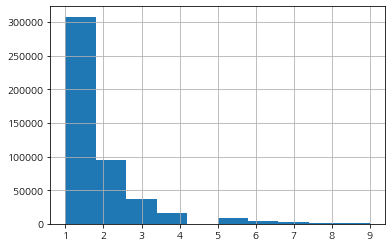

In [71]:
# 5.1 이용건수의 분포  (그래프가 쏠림이 있다면, 불리언인덱싱으로 데이터범위를 조정한다.)
bikeusage.loc[bikeusage['이용건수']<10,'이용건수'].hist();

In [72]:
# 5.2 평균이동거리 (=이동거리(M)/이용건수),  평균이용시간 (=이용시간(M)/이용건수) 컬럼을 생성한다. 
#   .describe() 로 데이터가 생성되었는지 확인한다.

bikeusage['평균이동거리']=bikeusage['이동거리(M)']/bikeusage['이용건수']
bikeusage['평균이용시간']=bikeusage['이용시간(분)']/bikeusage['이용건수']
bikeusage.describe()

,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분),평균이동거리,평균이용시간
count,474631.000000,474631.000000,472387.000000,472387.000000,474631.000000,474631.000000,474631.000000,474631.000000
mean,1409.829944,1.669941,125.185997,1.081429,4639.316900,42.982490,2825.972508,26.076282
std,929.803462,1.315851,182.175781,1.564946,6737.240458,55.616423,3523.807737,26.372140
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,621.000000,1.000000,28.760000,0.250000,1081.715000,11.000000,892.882500,9.000000
50%,1248.000000,1.000000,67.220001,0.590000,2513.140000,25.000000,1760.000000,17.000000
75%,2089.000000,2.000000,152.279999,1.320000,5670.505000,55.000000,3461.102500,34.500000
max,9999.000000,61.000000,11399.179688,107.470001,463301.420000,3906.000000,248420.000000,1007.000000


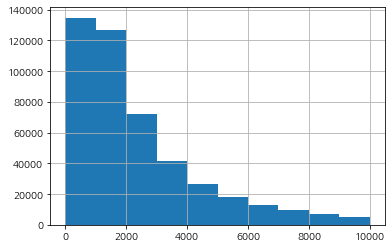

In [76]:
# 5.3 평균이동거리와 평균이용시간의 분포를 히스토그램으로 관찰한다. 필요에 따라 적절한 범위를 선택한다. 
bikeusage.loc[bikeusage['평균이동거리']<10000,'평균이동거리'].hist();

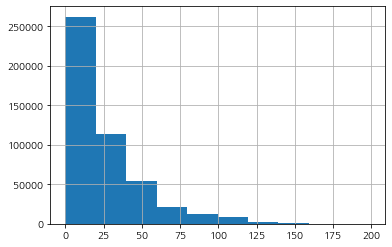

In [77]:
bikeusage.loc[bikeusage['평균이용시간']<200,'평균이용시간'].hist();

## 6. Seaborn으로 다음의 그래프를 작성한다. 

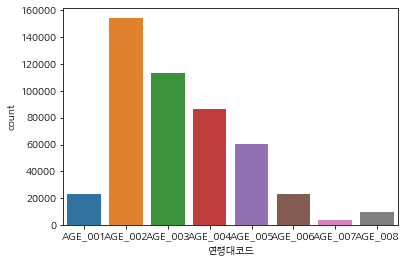

In [80]:
# 6.1 연령대코드별 사용량 (이용건수 합계로 구해야 하지만, 약식으로 countplot을 사용한다. 정확한 분포와는 차이가 있다. )
sns.countplot(data=bikeusage, x = '연령대코드');

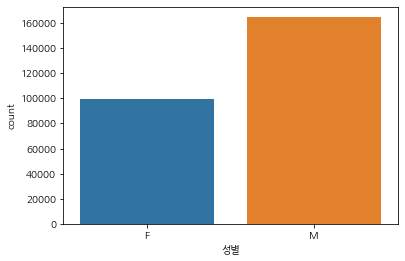

In [81]:
# 6.2 성별 사용량 (이용건수 합계로 구해야 하지만, 약식으로 countplot을 사용한다. 정확한 분포와는 차이가 있다. )
sns.countplot(data=bikeusage, x = '성별');

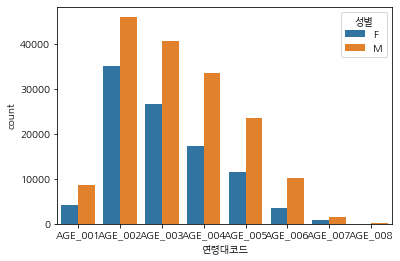

In [83]:
# 6.3 연령대별 성별 사용량 (둘 중 하나를 hue에 적용한다.   )
sns.countplot(data=bikeusage, x = '연령대코드', hue = '성별');

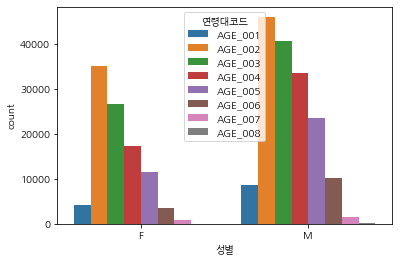

In [84]:
sns.countplot(data=bikeusage, x = '성별', hue = '연령대코드');

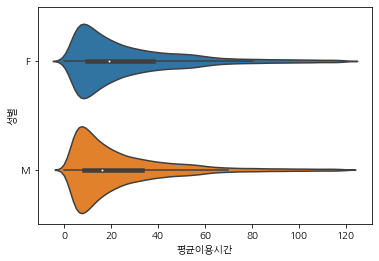

In [86]:
# 6.4 성별 평균이용시간 분포를 violin plot으로 표현한다. 
#   (이용시간 120분 초과한 값은 제외한다. bikeusage_120으로 저장해둔다.)
bikeusage_120 = bikeusage[bikeusage['평균이용시간']<=120]
sns.violinplot(x='평균이용시간', y = '성별', data=bikeusage_120);

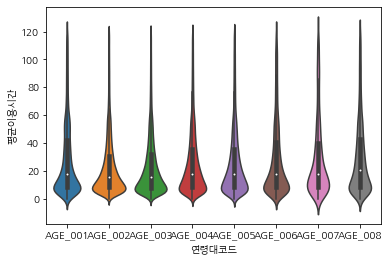

In [88]:
# 6.5 연령대별 평균이용시간 분포를 violin plot으로 표현한다. (평균이용시간 120분 이하)
bikeusage_120 = bikeusage[bikeusage['평균이용시간']<=120]
sns.violinplot(x='연령대코드', y = '평균이용시간', data=bikeusage_120);

In [91]:
# 6.6 연령대별 성별 평균이용시간을 catplot을 이용해서 표현한다. (평균이용시간 120분 이하)
#  x축으로 분포가 보이는 violinplot으로 작성한다. 
#  컬럼방향으로 연령대를 배치 한다.  col_wrap=4 인수를 추가하여 4개의 열에서 줄바꿈 하도록 한다.

C:\Users\duswn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\duswn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


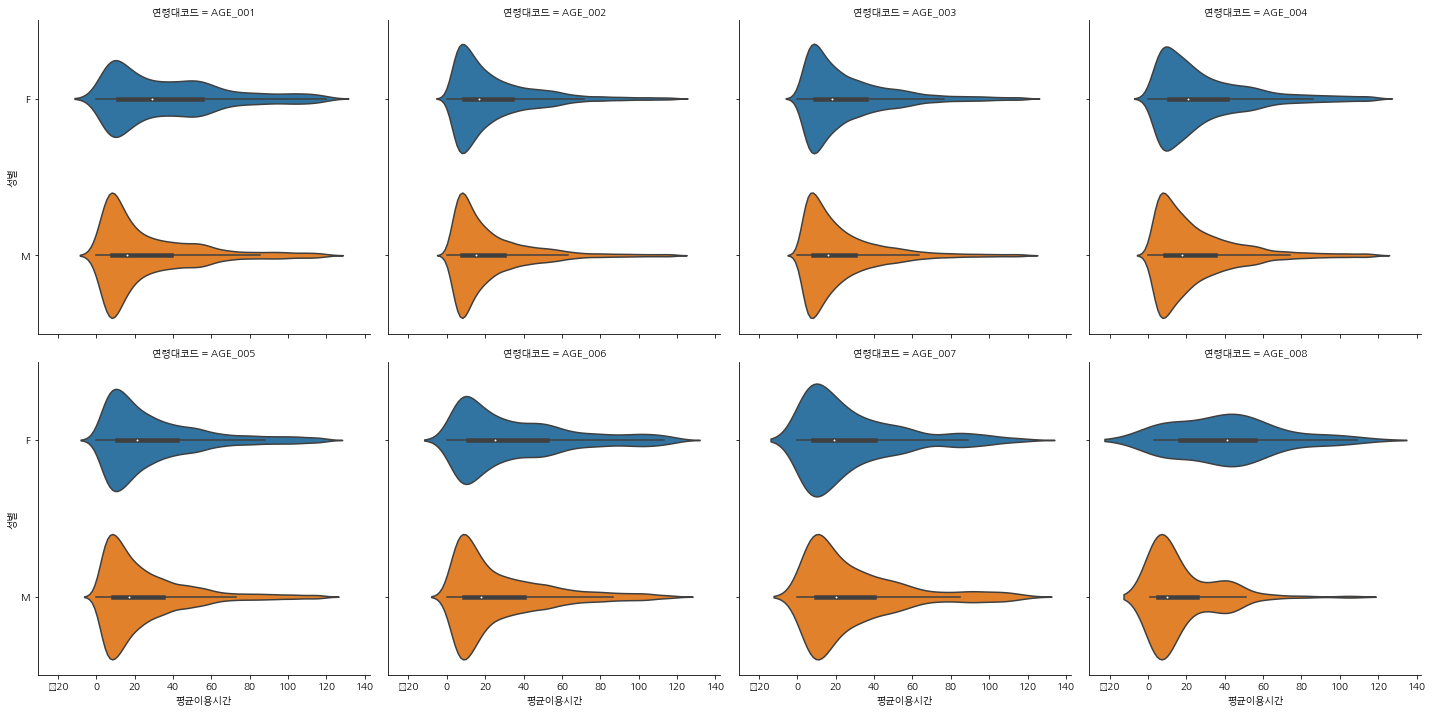

In [90]:
ax_array = sns.catplot(x = '평균이용시간', y ='성별', col = '연령대코드', col_wrap=4, kind = 'violin',data = bikeusage_120);